# <center>Amazon Sales Report Analysis 

## Introduction

### Purpose of Analysis

The primary goal of this analysis is to explore and understand the Amazon sales report dataset. This involves extracting meaningful insights, preprocessing the data, creating visualizations, building predictive models, and developing a comprehensive dashboard. By analyzing this dataset, we aim to uncover trends, patterns, and factors that influence the order status, ultimately providing actionable insights for better decision-making.

### Dataset Description

The dataset used in this analysis contains detailed information on Amazon sales transactions. The data includes multiple attributes that capture various aspects of each sale, such as:

- **ID**: Unique identifier for each transaction.
- **Date**: The date on which the transaction took place.
- **Status**: The current status of the order (e.g., Shipped, Cancelled).
- **Fulfilment**: Indicates whether the order was fulfilled by Amazon or a merchant.
- **Sales Channel**: The channel through which the sale was made (e.g., Amazon.in).
- **ship-service-level**: The level of shipping service chosen (e.g., Standard, Expedited).
- **Style**: The style code of the product.
- **SKU**: Stock Keeping Unit, a unique identifier for each product.
- **Category**: The category of the product (e.g., kurta, top).
- **Size**: The size of the product.
- **ASIN**: Amazon Standard Identification Number, unique for each product.
- **Courier-Status**: The status of the courier handling the shipment.
- **Quantity**: The number of items ordered.
- **Price-INR**: The price of the order in Indian Rupees.
- **ship-city**: The city to which the product is shipped.
- **ship-state**: The state to which the product is shipped.
- **ship-postal-code**: The postal code of the shipping address.
- **ship-country**: The country to which the product is shipped.
- **promotion-ids**: IDs of any promotions applied to the order.
- **B2B**: Indicates whether the sale is a business-to-business transaction.

This rich dataset allows for an in-depth analysis of sales performance, customer preferences, and logistical efficiencies. By leveraging various data analysis and machine learning techniques, we aim to provide a comprehensive overview of Amazon's sales operations.


# Data Preprocessing

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data set

In [5]:
#I had a problem accessing the dataset as a csv file, so I loaded it into an excel file and it have worked

In [2]:
df = pd.read_excel('test.xlsx')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,0.0,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1.0,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,0.0,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,0.0,NaN,NaN


#### EDA

In [7]:
# first , I dropped the unneccesary columns to reduce the dimensions of the data
df.drop(['index','Unnamed: 22'], axis=1, inplace=True)

In [9]:
df.describe()

,Qty,Amount,ship-postal-code,B2B
count,128975.000000,121180.000000,128940.000000,128973.000000
mean,0.904431,648.561465,463969.927594,0.006753
std,0.313354,281.211687,191475.956294,0.081901
min,0.000000,0.000000,110001.000000,0.000000
25%,1.000000,449.000000,382421.000000,0.000000
50%,1.000000,605.000000,500033.000000,0.000000
75%,1.000000,788.000000,600024.000000,0.000000
max,15.000000,5584.000000,989898.000000,1.000000


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,128977,120379,171-5057375-2831560,12
Date,128977,92,05-03-22,2085
Status,128977,14,Shipped,77804
Fulfilment,128977,4,Amazon,89698
Sales Channel,128977,3,Amazon.in,128851
ship-service-level,128977,3,Expedited,88615
Style,128977,1378,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [13]:
#exploring the data set in a nutshell 
df.shape

(128977, 22)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128977 non-null  object 
 1   Date                128977 non-null  object 
 2   Status              128977 non-null  object 
 3   Fulfilment          128977 non-null  object 
 4   Sales Channel       128977 non-null  object 
 5   ship-service-level  128977 non-null  object 
 6   Style               128977 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  float64
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

#### DATA Cleaning 

In [18]:
#I think this column is not necessary as It has only Easy ship or null so i deleted it
df.drop(['fulfilled-by'], axis=1, inplace=True)

In [27]:
# I have noticed that the Date columns is typed as object so I changed it
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce' , format='%Y%m%d')
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df.rename(columns={'Amount':'Price-INR',
                   'Sales Channel':'Sales-Channel',
                   'Qty':'Quantity',
                   'Order ID':'ID',
                   'Courier Status':'Courier-Status'}, inplace=True)

In [33]:
df['ship-postal-code'] = df['ship-postal-code'].astype('object')

In [35]:
#as I have changed the price column and provided it with the currency 
#So, The currency columns became unnecessary
df.drop(['currency'], axis=1, inplace=True)

In [37]:
df['Courier-Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [39]:
df.loc[df['Quantity']==0,'Courier-Status'] = 'Cancelled'

In [41]:
df.loc[df['Courier-Status']=='Cancelled','Price-INR'] = 0

In [43]:
df.isna().sum()

ID                        0
Date                      2
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier-Status            2
Quantity                  2
Price-INR               126
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
dtype: int64

In [45]:
df = df.drop_duplicates()

In [47]:
df = df.dropna(subset=['Date'])

In [49]:
df = df.dropna(subset=['Price-INR','ship-state'])

In [51]:
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

#### Visualize the distribution of key features to identify trends and patterns.

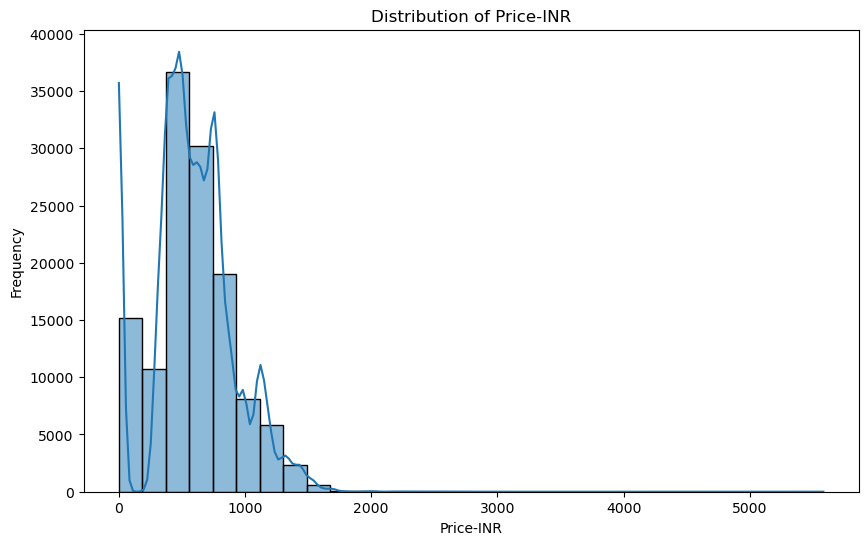

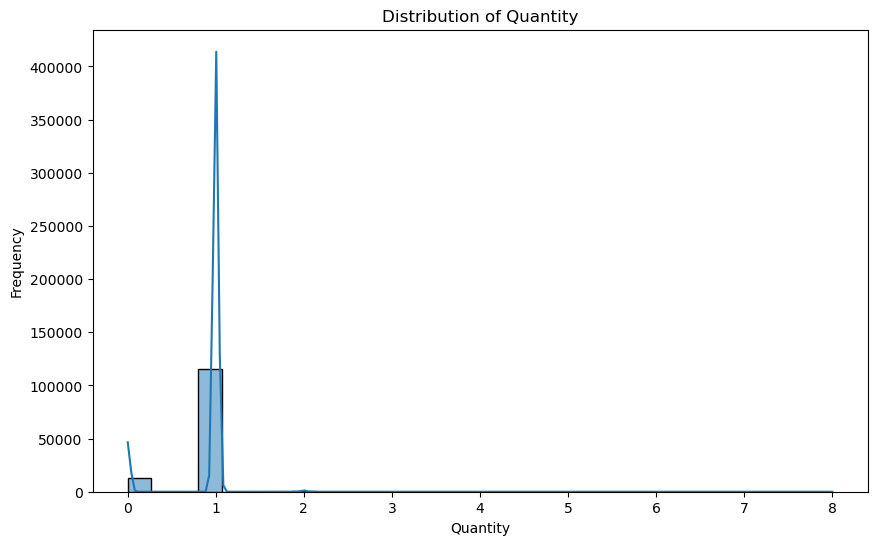

In [53]:
# Visualize the distribution of 'Price-INR'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price-INR'], bins=30, kde=True)
plt.title('Distribution of Price-INR')
plt.xlabel('Price-INR')
plt.ylabel('Frequency')
plt.savefig('Distribution of Price-INR.png')
plt.show()

# Visualize the distribution of 'Quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.savefig('Distribution of Quantity.png')

plt.show()


#### OUTLIERS

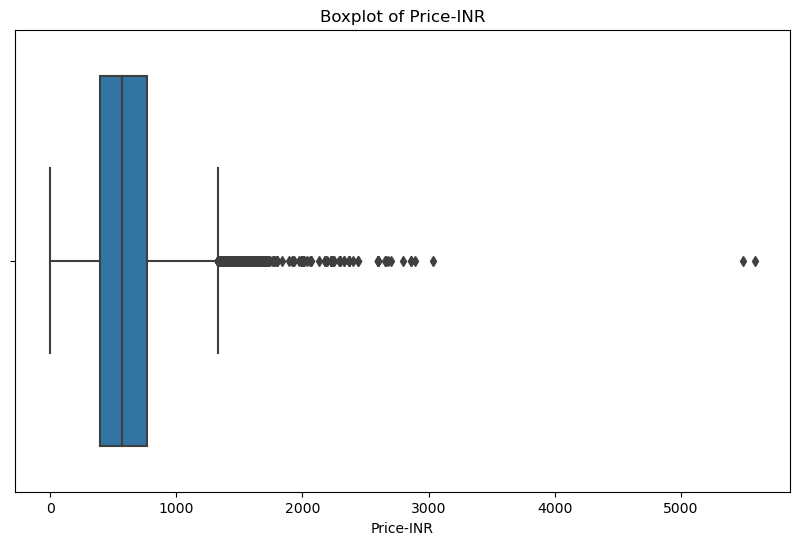

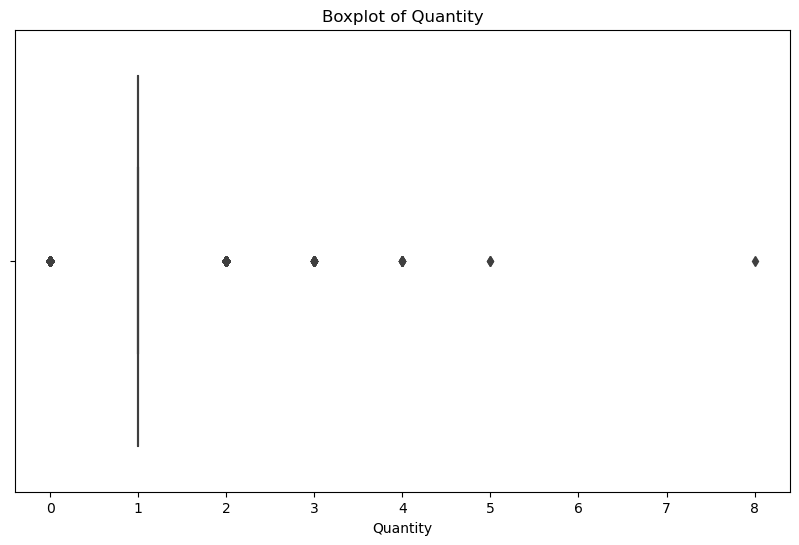

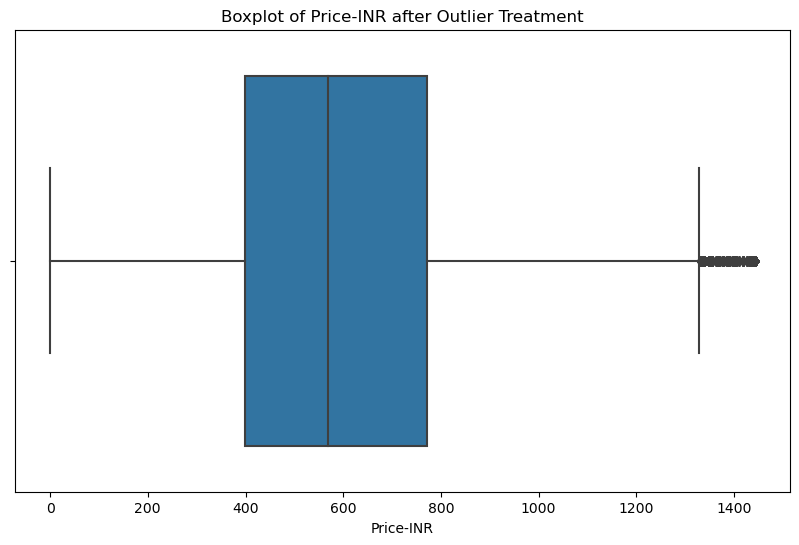

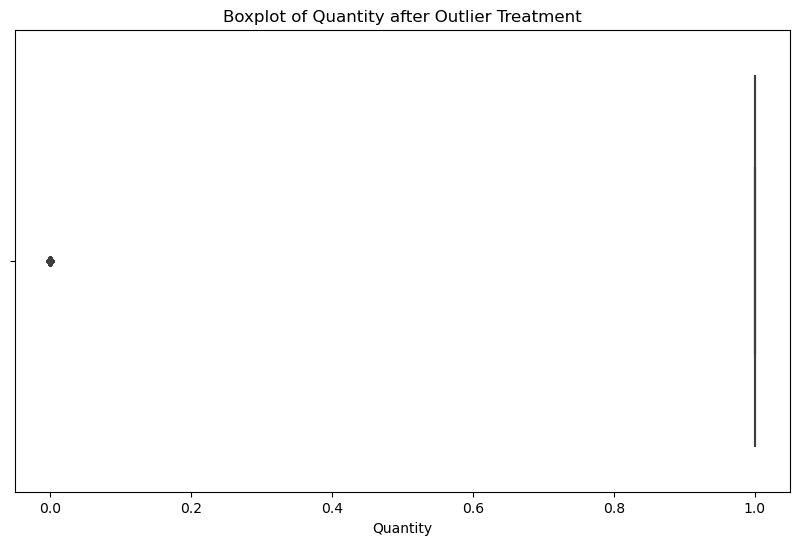

In [55]:
# Outlier detection for 'Price-INR' and 'Quantity'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price-INR'])
plt.title('Boxplot of Price-INR')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Treating outliers by capping them at the 99th percentile
price_cap = df['Price-INR'].quantile(0.99)
quantity_cap = df['Quantity'].quantile(0.99)

df['Price-INR'] = df['Price-INR'].apply(lambda x: min(x, price_cap))
df['Quantity'] = df['Quantity'].apply(lambda x: min(x, quantity_cap))

# Check the boxplots again after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price-INR'])
plt.title('Boxplot of Price-INR after Outlier Treatment')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity after Outlier Treatment')
plt.show()


## Saving the data into new csv and starting a new era of visualization 

In [57]:
df.to_csv('cleaned-df(3).csv', index=False)

___

In [59]:
df = pd.read_csv('cleaned-df(3).csv')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [63]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

## Visualization

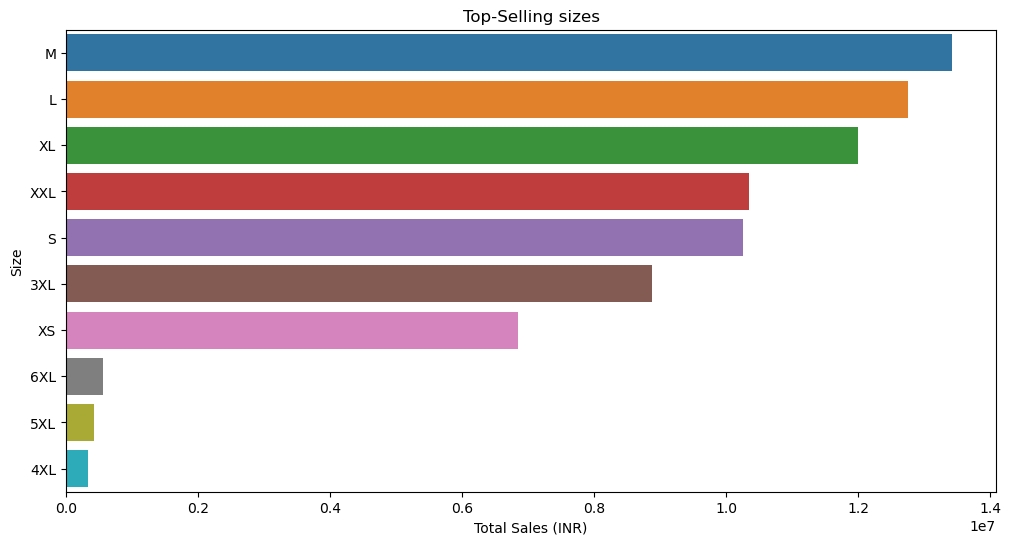

In [67]:
# Top-size categories
top_size = df.groupby('Size')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_size, x='Total', y='Size')
plt.title('Top-Selling sizes')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Size')
plt.show()

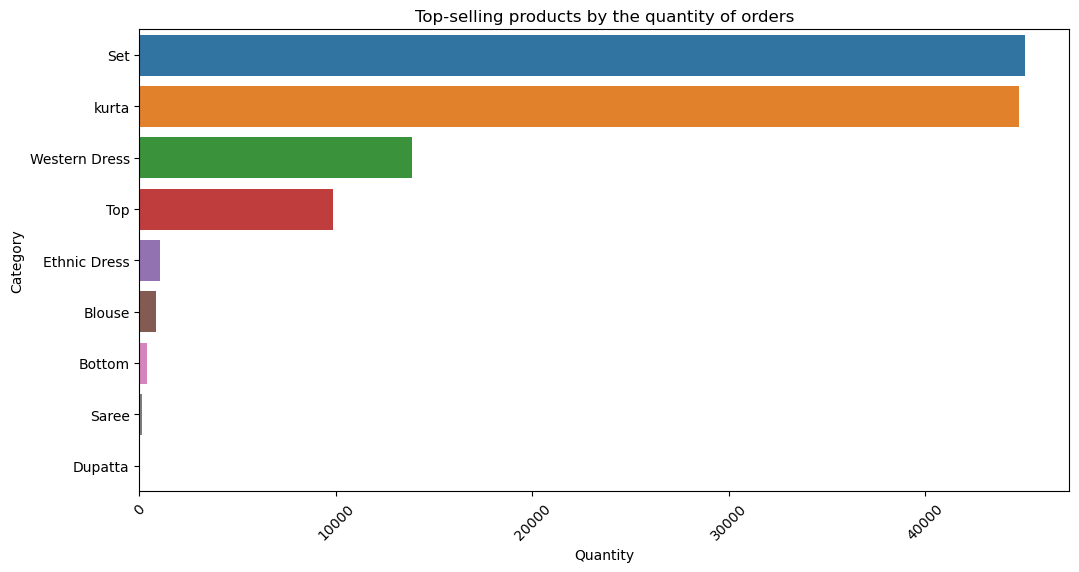

In [86]:
df_cat=df.groupby(['Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y='Category',x='Quantity', data=df_cat)
plt.xticks(rotation=45)
plt.title('Top-selling products by the quantity of orders')
plt.show()

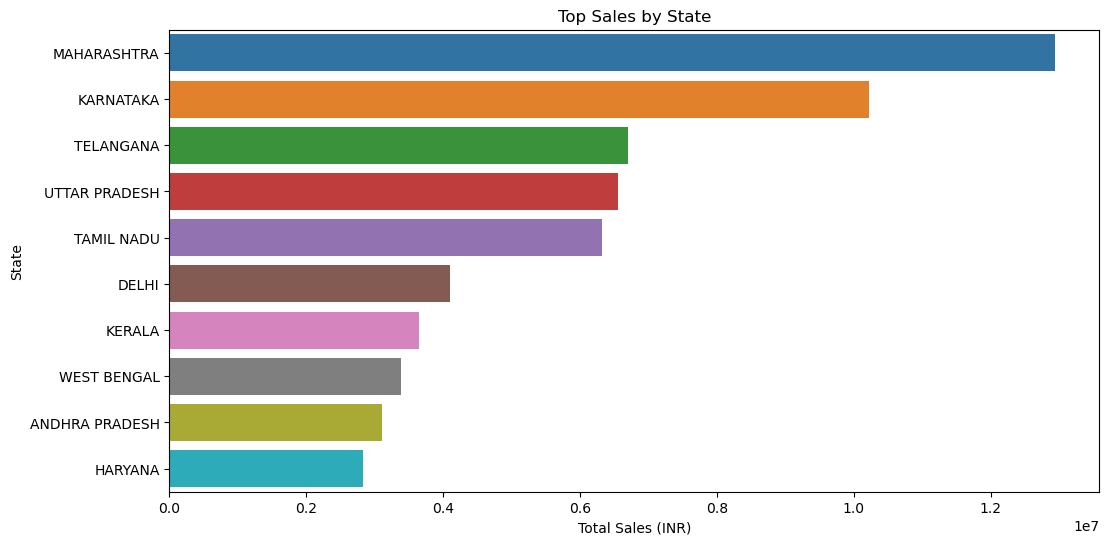

In [91]:
# Regional sales distributions
top_states = df.groupby('ship-state')['Total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Total', y='ship-state')
plt.title('Top Sales by State')
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.show()

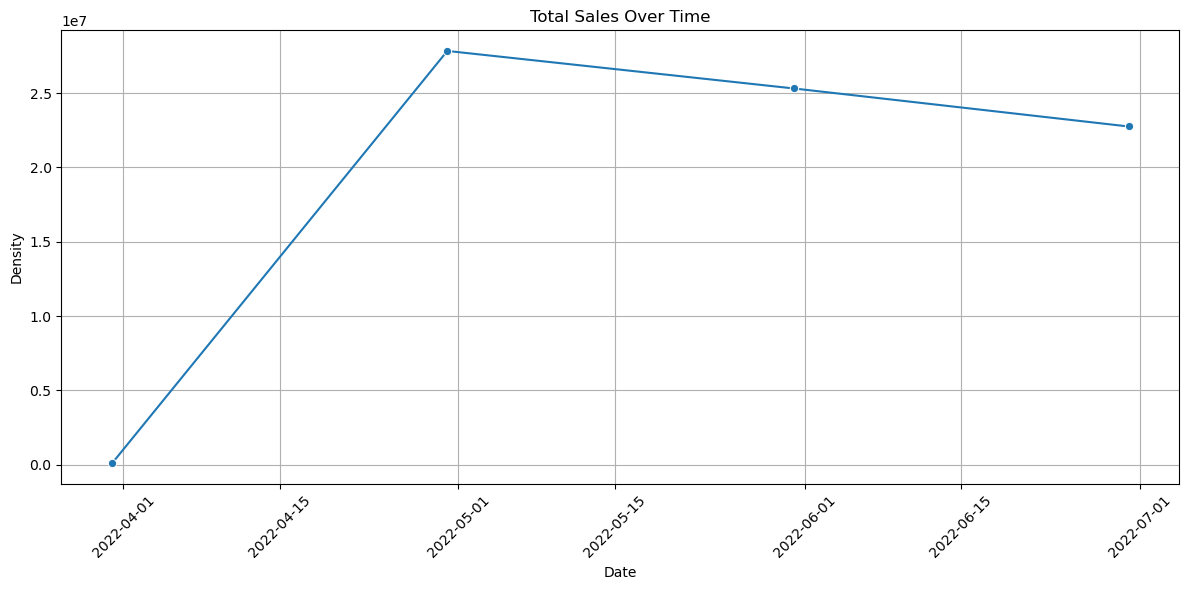

In [104]:
# Aggregate sales by Date (assuming daily data)
monthly_sales = df.resample('M', on='Date')['Total'].sum().reset_index()

# Plotting total sales over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=monthly_sales, marker='o')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

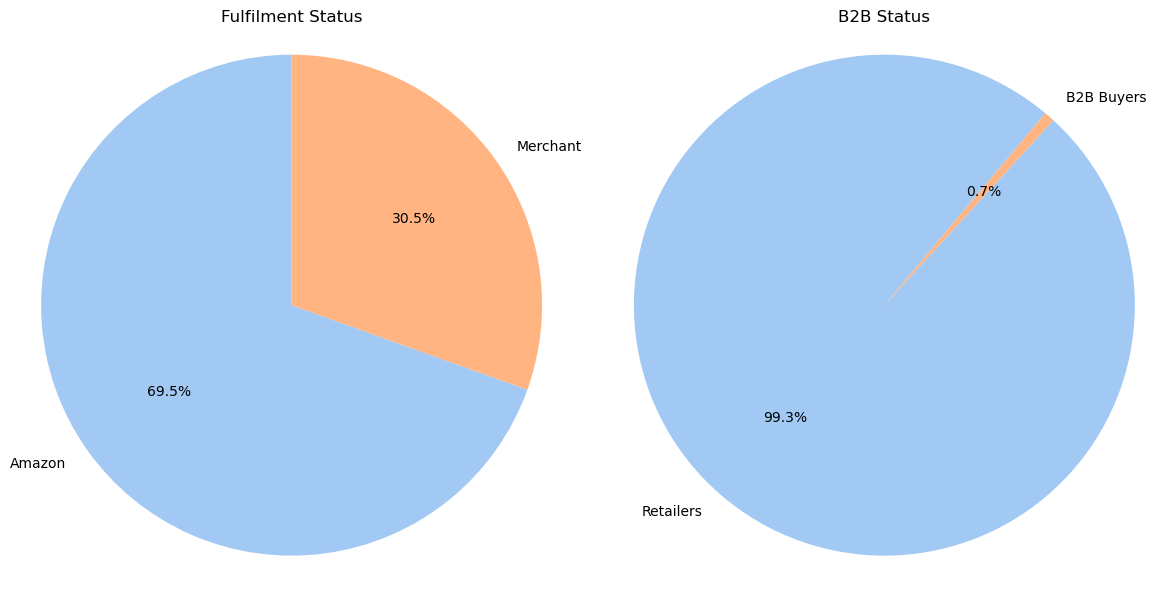

In [137]:
# Calculate value counts for Fulfilment and B2B columns
fulfilment_counts = df['Fulfilment'].value_counts()
B2B_counts = df['B2B'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot first pie chart (Fulfilment)
ax1.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax1.set_title('Fulfilment Status')
ax1.axis('equal')  # Ensure the pie chart is a circle

# Plot second pie chart (B2B)
ax2.pie(B2B_counts, labels=['Retailers', 'B2B Buyers'], autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
ax2.set_title('B2B Status')
ax2.axis('equal')  # Ensure the pie chart is a circle

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


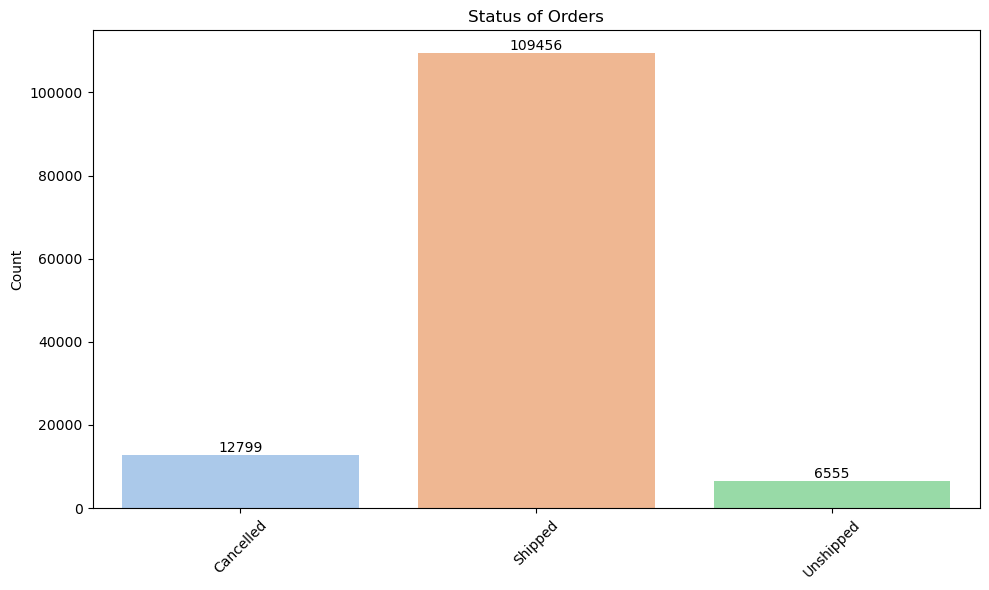

In [141]:
# Plot the second visualization
df1 = df.groupby('Courier-Status')['ID'].count()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1.values, palette='pastel', ax=ax)
plt.title('Status of Orders')
plt.xlabel(None)
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


# The Visualizations all in one cell 

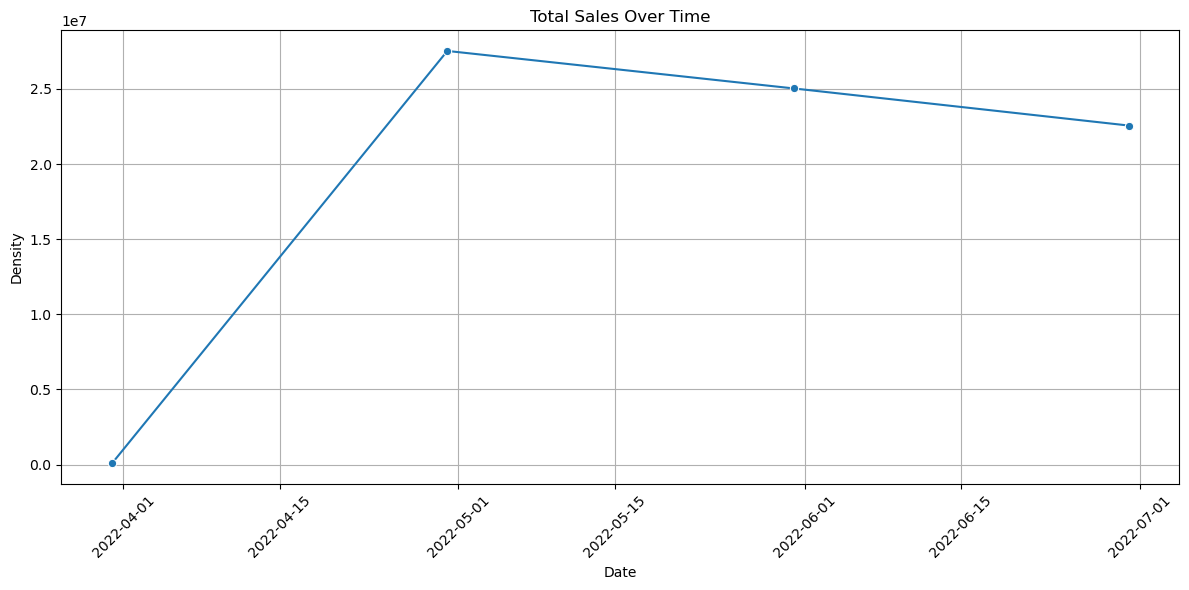

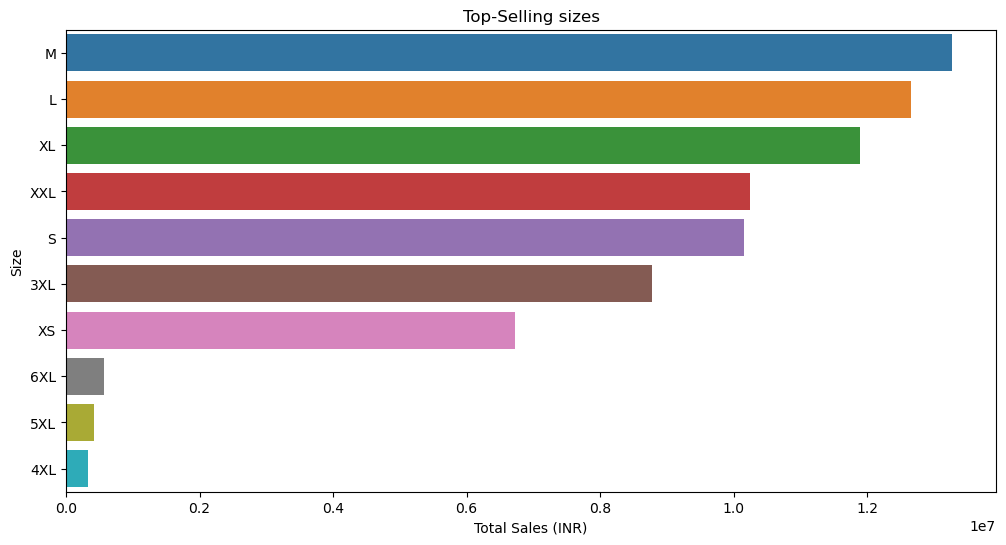

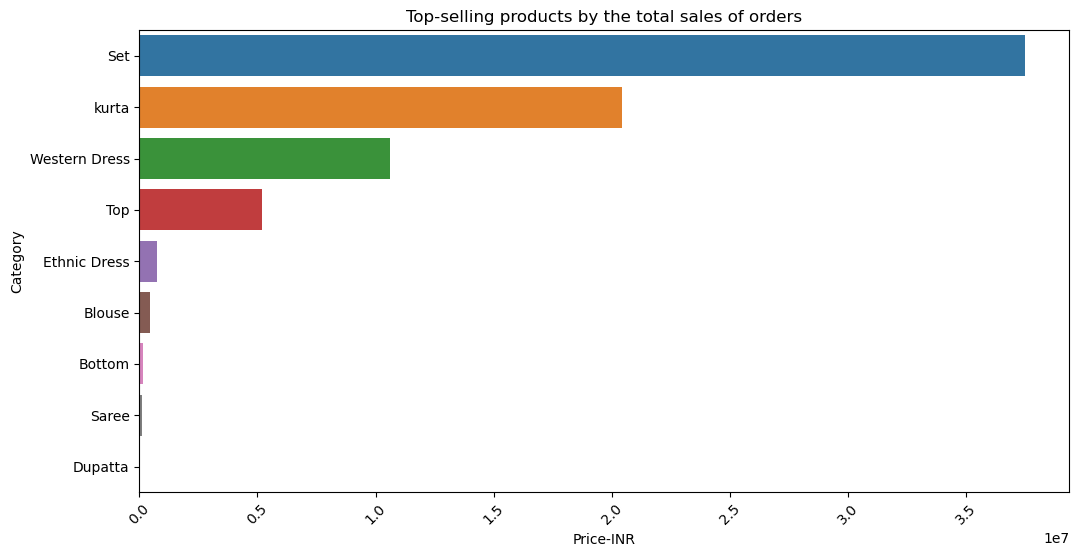

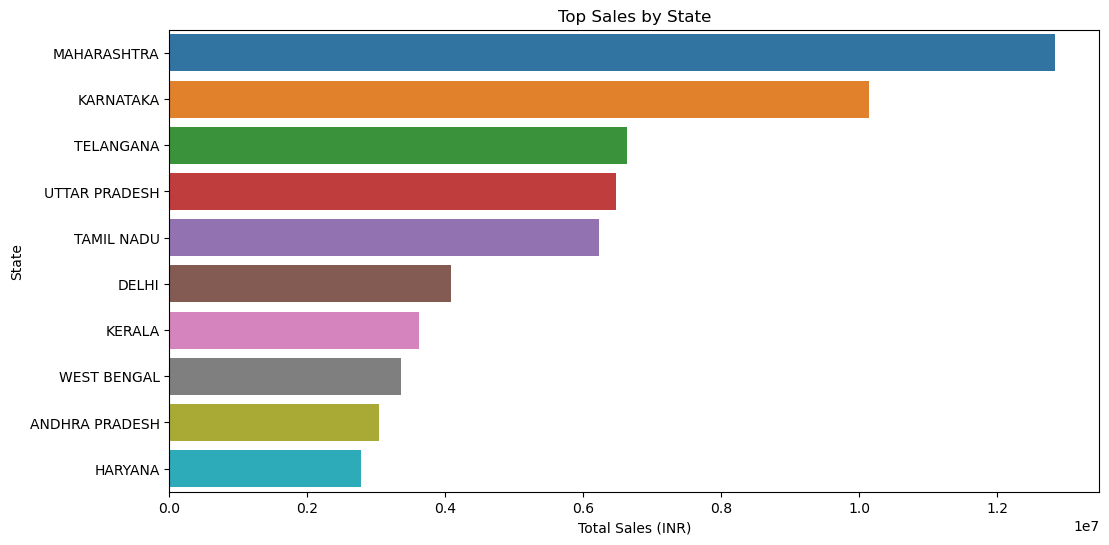

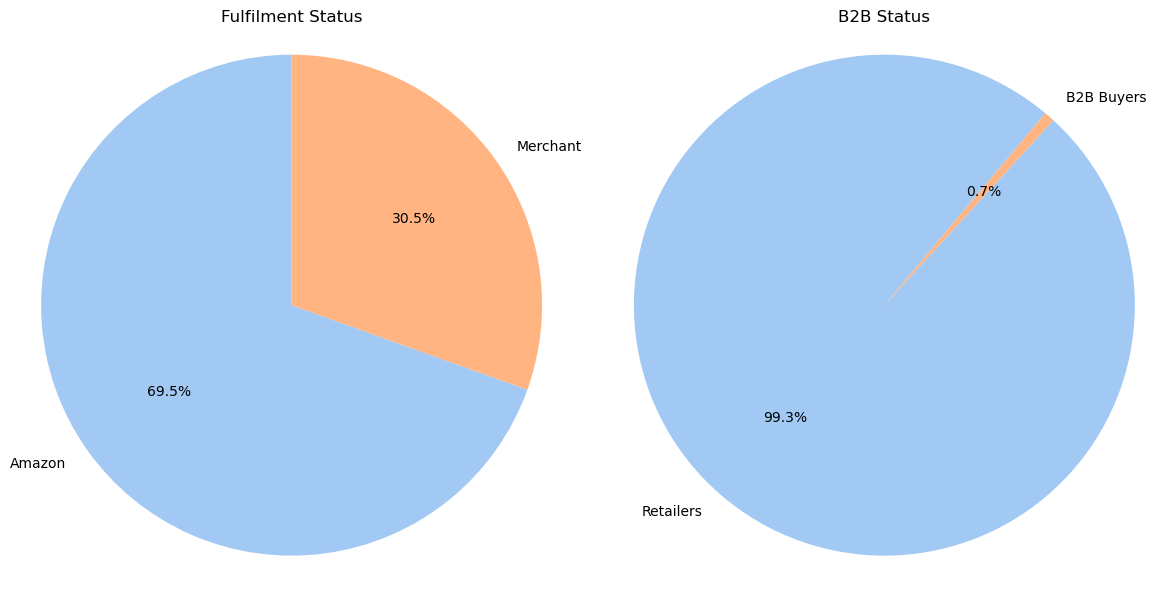

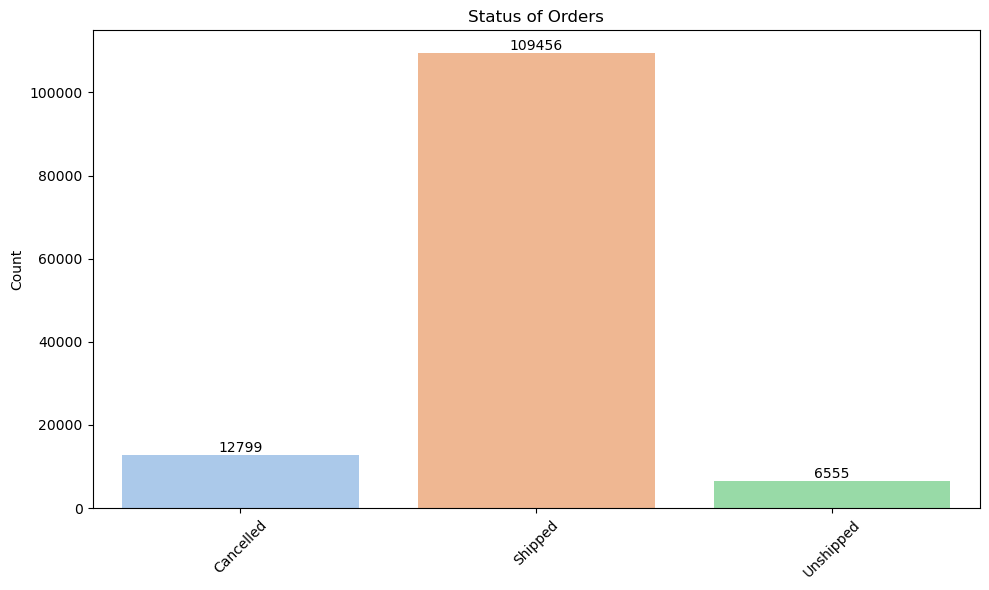

In [82]:
# Aggregate sales by Date (assuming daily data)
monthly_sales = df.resample('M', on='Date')['Price-INR'].sum().reset_index()

# Plotting total sales over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price-INR', data=monthly_sales, marker='o')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total Sales Over Time.png')
plt.show()

# Top-size categories
top_size = df.groupby('Size')['Price-INR'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_size, x='Price-INR', y='Size')
plt.title('Top-Selling sizes')
plt.xlabel('Total Sales (INR)')
plt.ylabel('Size')
plt.savefig('Top-Selling sizes.png')
plt.show()

df_cat=df.groupby(['Category'], as_index=False)['Price-INR'].sum().sort_values(by='Price-INR',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y='Category',x='Price-INR', data=df_cat)
plt.xticks(rotation=45)
plt.title('Top-selling products by the total sales of orders')
plt.savefig('Top-selling products by the total sales of orders.png')
plt.show()

# Regional sales distributions
top_states = df.groupby('ship-state')['Price-INR'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Price-INR', y='ship-state')
plt.title('Top Sales by State')
plt.xlabel('Total Sales (INR)')
plt.ylabel('State')
plt.savefig('Top Sales by State.png')
plt.show()

# Calculate value counts for Fulfilment and B2B columns
fulfilment_counts = df['Fulfilment'].value_counts()
B2B_counts = df['B2B'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot first pie chart (Fulfilment)
ax1.pie(fulfilment_counts, labels=fulfilment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax1.set_title('Fulfilment Status')
ax1.axis('equal')  # Ensure the pie chart is a circle

# Plot second pie chart (B2B)
ax2.pie(B2B_counts, labels=['Retailers', 'B2B Buyers'], autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
ax2.set_title('B2B Status')
ax2.axis('equal')  # Ensure the pie chart is a circle

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.savefig('Fulfilment Status,B2B Status.png')
plt.show()

# Plot the second visualization
df1 = df.groupby('Courier-Status')['ID'].count()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1.values, palette='pastel', ax=ax)
plt.title('Status of Orders')
plt.xlabel(None)
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig('Status of Orders.png')
plt.show()



# Building Predictive Models

### Importing Required Libraries

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Preparing the data for the model

In [69]:
# Selecting features and target
X = df.drop(columns=['ID', 'Date', 'Status'])
y = df['Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64']).columns


### Building and testing the model

In [71]:
# Creating preprocessing pipelines for both categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Creating a pipeline that first transforms the data then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
report = classification_report(y_test, y_pred)

print(report)

C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                               precision    recall  f1-score   support\n\n                    Cancelled       0.99      1.00      0.99      3683\n                      Pending       0.80      0.56      0.66       129\nPending - Waiting for Pick Up       0.60      0.83      0.70        53\n                      Shipped       1.00      1.00      1.00     15567\n Shipped - Delivered to Buyer       0.92      1.00      0.95      5715\n    Shipped - Lost in Transit       0.00      0.00      0.00         2\n   Shipped - Out for Delivery       0.00      0.00      0.00         8\n          Shipped - Picked Up       0.91      0.40      0.56       205\n  Shipped - Rejected by Buyer       0.00      0.00      0.00         1\n Shipped - Returned to Seller       0.14      0.01      0.01       375\nShipped - Returning to Seller       0.00      0.00      0.00        24\n\n                     accuracy                           0.98     25762\n                    macro avg       0.49      0.44      0.4

In [75]:
from sklearn.linear_model import LogisticRegression

# Using a smaller subset of the data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Creating a pipeline that first transforms the data then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Training the model on the smaller subset
model.fit(X_train_subset, y_train_subset)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
report = classification_report(y_test, y_pred)

print(report)


C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

                    Cancelled       0.99      1.00      0.99      3683
                      Pending       0.68      0.71      0.69       129
Pending - Waiting for Pick Up       0.69      0.34      0.46        53
                      Shipped       1.00      1.00      1.00     15567
 Shipped - Delivered to Buyer       0.90      1.00      0.95      5715
    Shipped - Lost in Transit       0.00      0.00      0.00         2
   Shipped - Out for Delivery       0.00      0.00      0.00         8
          Shipped - Picked Up       0.75      0.01      0.03       205
  Shipped - Rejected by Buyer       0.00      0.00      0.00         1
 Shipped - Returned to Seller       0.07      0.01      0.01       375
Shipped - Returning to Seller       0.00      0.00      0.00        24

                     accuracy                           0.97     25762
                    macro avg       0.46      0.37      0.38     25762
    

C:\Users\Fc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualization of the results

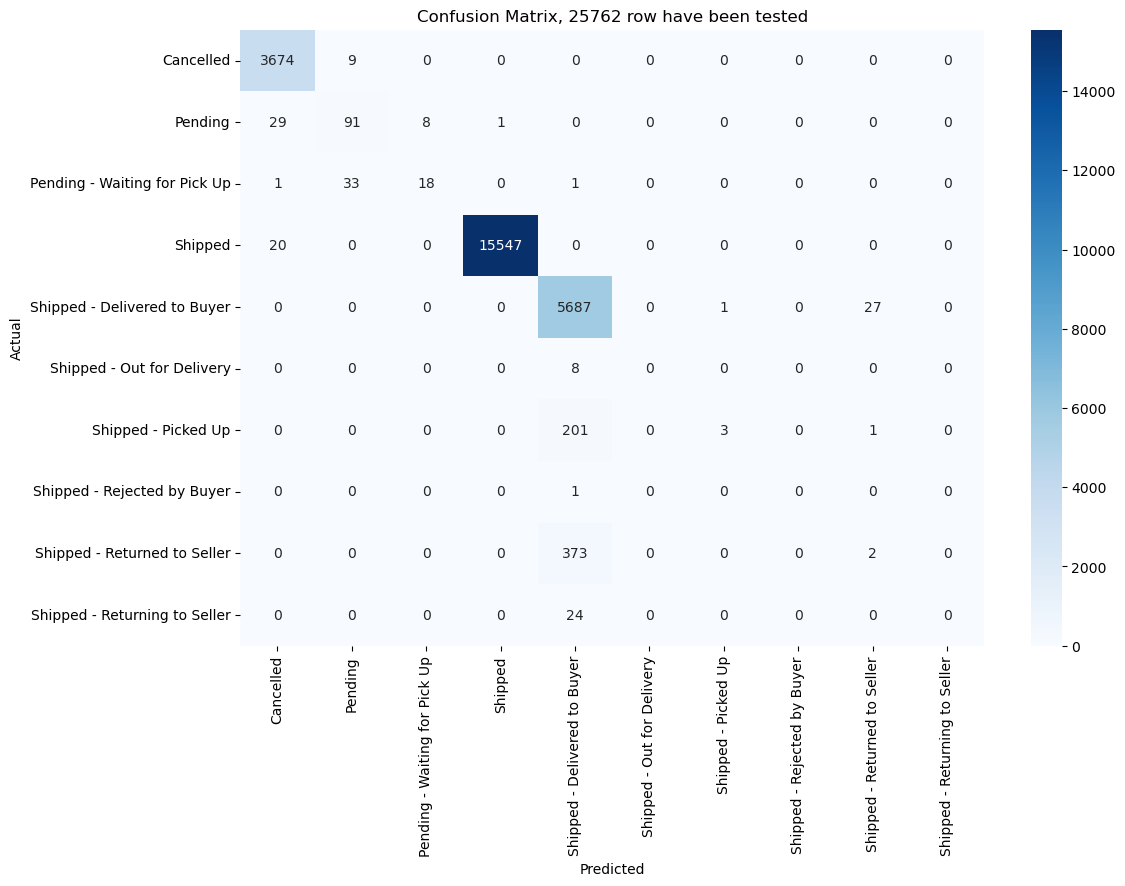

In [85]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)
num_rows = y_test.shape[0]
# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix, {num_rows} row have been tested')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Model.png')
plt.show()


# The Dashboard

In [79]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Month'] = df['Date'].dt.month  
    
monthly_sales = df.groupby('Month')['Price-INR'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

top_sizes = df.groupby('Size')['Price-INR'].sum().nlargest(10).reset_index()
top_categories = df.groupby('Category')['Price-INR'].sum().nlargest(10).reset_index()
top_states = df.groupby('ship-state')['Price-INR'].sum().nlargest(10).reset_index()


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Amazon Sales Dashboard"),
    
    dcc.Tabs(id="tabs", children=[
        dcc.Tab(label='Sales Trends', children=[
            dcc.Graph(
                id='monthly-sales',
                figure={
                    'data': [
                        {'x': monthly_sales['Month'], 'y': monthly_sales['Price-INR'], 'type': 'line', 'name': 'Monthly Sales'},
                    ],
                    'layout': {
                        'title': 'Monthly Sales Trends'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Top Sizes', children=[
            dcc.Graph(
                id='top_size',
                figure={
                    'data': [
                        {'x': top_size['Price-INR'], 'y': top_size['Size'], 'type': 'bar', 'orientation': 'h', 'name': 'Top sizes'},
                    ],
                    'layout': {
                        'title': 'Top-Selling sizes'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Top Categories', children=[
            dcc.Graph(
                id='top-categories',
                figure={
                    'data': [
                        {'x': top_categories['Price-INR'], 'y': top_categories['Category'], 'type': 'bar', 'orientation': 'h', 'name': 'Top Categories'},
                    ],
                    'layout': {
                        'title': 'Top-Selling Categories'
                    }
                }
            )
        ]),
        
        dcc.Tab(label='Sales by State', children=[
            dcc.Graph(
                id='top-states',
                figure={
                    'data': [
                        {'x': top_states['Price-INR'], 'y': top_states['ship-state'], 'type': 'bar', 'orientation': 'h', 'name': 'Top States'},
                    ],
                    'layout': {
                        'title': 'Top Sales by State'
                    }
                }
            )
        ])
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


C:\Users\Fc\AppData\Local\Temp\ipykernel_8664\3537689103.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Fc\AppData\Local\Temp\ipykernel_8664\3537689103.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
